<h1>Section 1: Dataset</h1> 
<p> The "Chess FIDE Rankings" dataset is a csv containing the top 200 chess players in the world with the highest FIDE rating score. It contains 200 rows for each player and 7 columns as follows... </p>
<ul>
<li>rank: The players international ranking from 1-200</li>
<li>name: Pretty self explanitory...</li>
<li>ELO: A score associated with a player based on their past performances</li>
<li>title: A players professional designation (What type of master they are)</li>
<li>federation: The country a player plays chess most in and considers their "home country" for international contests (Although not always their country of origin)</li>
<li>games: The number of professional, ranked games a player has played so far</li>
<li>birth_year: The year in which the player was born</li>
</ul>
<p>Out of the 7 columns, ELO is the most important, as a player's rank and thereby ordering in the dataset is determined by this score. To give some background, the system of ELO ratings was invented in Arpad Elo in 1960. Elo designed the system to calculate the relative skill of players in a zero-sum game, a game where one player wins and the other consequently loses. Elo built the system for the United States Chess Federation (USCF), and today the metric is used to rank chess players in all major chess federations, including the Fédération Internationale des Échecs (FIDE).</p>
<p>To give a brief overview of the math behind these rankings, the formula to calculate a change in ELO ranking is as follows...</p>
<p>R'a = Ra + K*(Sa — Ea)</p>
<p>Where...<br>
R'a: The player's new Elo rating after the match<br>
Ra: The player's Elo rating before the match<br>
Ea: The expected outcome of the match<br>
Sa: The actual outcome of the match<br>
K: A scaling factor that determines how much a match affects the player's overall Elo</p>
<p>For additional context, a players ELO rankings are completely dependent on the outcome of a match and the ELO of the opponent they play. In addition FIDE, the international governing body of chess, uses a K value of 10 for all players with a published rating of 2400 or higher</p>
<p><br></p>
<p>This dataset was sourced from Kaggle.com and is a free dataset for anyone to use. <https://www.kaggle.com/datasets/surajjha101/fide-chess-rankings-updated/data></p>
<p><br></p>
<p>As for my interest in this dataset, I've been an avid chess player since I was 10 years old. I've played in hundreds of tournaments, logged thousands of games, and even met and played against a handful of masters. I've played blindfolded, against 10+ opponents at once, and even played in some notable midwest regional and a few national level tournaments. I reached a peak USCF rating of around 1700 when I was finishing high school, and although my window to become a Grandmaster has certainly passed, my chance to become a data science master is now.</p>
<p>In many ways CS and Chess are intertwined. Virtually all modern grandmasters train with top noch AI powered chess engines, such as Stockfish, Deep Blue, and AlphaZero. My goal in examining this dataset is to see how ranking corelates with age, specifically, if younger masters are achieving higher ELO ratings on average when compared with older players, suggesting a corelation with their use of Chess AI</p>


In [2]:
# Kaggle link doesnt work needs to be fixed
import pandas as pd

df = pd.read_csv("Chess FIDE Rankings.csv")
print(df.head())
print("rows = " + str(len(df)))
print(df.columns)

   rank               name   ELO  title     federation   games  birth_year
0      1    Magnus Carlsen   2864    GM         Norway    3125        1990
1      2        Liren Ding   2806    GM          China    1630        1992
2      3  Alireza Firouzja   2793    GM         France     845        2003
3      4    Fabiano Caruana  2783    GM  United States    2622        1992
4      5     Levon Aronian   2775    GM  United States    3320        1982
rows = 200
Index(['rank ', 'name ', 'ELO ', 'title', 'federation ', 'games',
       'birth_year'],
      dtype='object')


<h1>Section 2: Exploratory Data Analysis</h1>

<p>To understand the scope of the dataset, we can examine the range of the dataset. Examining the range of the data shows us that the top 200 players span only a difference of 256 points, a comparably small amount. Likewise, the average rating of the players in the dataset is 2662.385, while the median is 2650.5. This, in combination with the standard deviation of 47.20879288467499, reinforces our conclusion that the data is relatively spread out over a small range. Likewise, considering that the mean and median are near the bottom of the range of data, we can see that the data is squeued to the left.</p>
<p>When we look at birth year, the oldest player is 58 years old, while the youngest is 17, giving us an age range of 41 years. The average birth year is 1989, meaning that the mean age is 34 years old. The median birth year is 1990. Because the mean and median birth year are close we can conclude that the data is not squeued by a few very old or very young players. </p>

In [3]:
print(df["ELO "].max() - df["ELO "].min()) #range
print(df["ELO "].mean())
print(df["ELO "].median())
print(df["ELO "].std())
print(df["birth_year"].mean())
print(df["birth_year"].median())
print(df["birth_year"].max() - df["birth_year"].min())
print(df.nlargest(1, "birth_year"))
print(df.nsmallest(1, "birth_year"))

256
2662.385
2650.5
47.20879288467499
1989.395
1990.0
41
    rank       name   ELO  title federation   games  birth_year
52     53  Gukesh D   2684    GM      India     569        2006
     rank                      name   ELO  title federation   games  \
176    177  Miguel Illescas Cordoba   2614    GM      Spain    1402   

     birth_year  
176        1965  


<h1>Section 3: Exploratory Data Visualization</h1>
<p> The first visualization is a bar chart of the ELO rating of all players in the dataset. It shows the relatively small difference in rating between players in the dataset.<br> The second visualization is a histogram of the ELO ratings of all the players in the dataset. It has a bin for every 10 Elo Points and shows that while the data doesnt have a large spread, it is relatively squeued twoards lower ratings, as realistically we are looking at the far right tail of a normal curve.<br> The third visualization is a line graph of Average ELO rating VS Birth Year. This visualization is intended to examine the relationship between age and rating.</p>

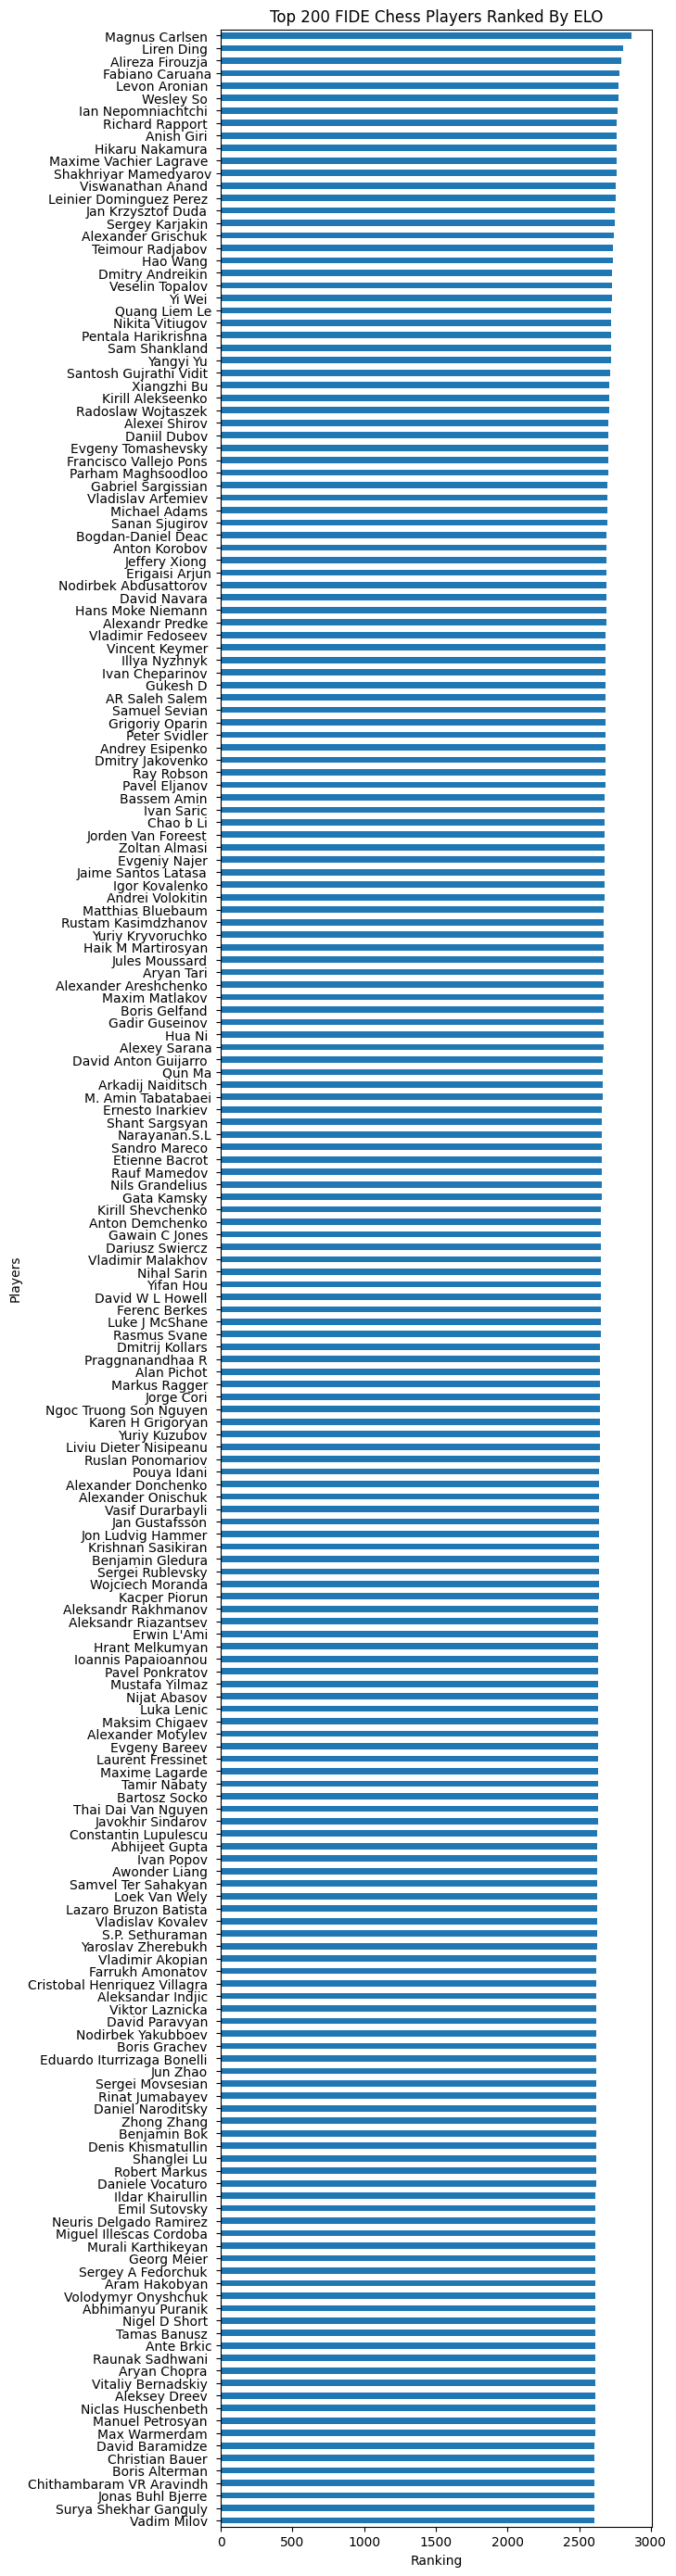

In [4]:
#Prints a big Bar Chart Ordering All Players
df_ELO = pd.DataFrame({'Players': df["name "],'Ranking': df["ELO "]})[::-1]
bars = df_ELO.plot(kind='barh', y='Ranking', x='Players', figsize=(6, 35), legend=False)
bars.set_xlabel("Ranking")
bars.set_title("Top 200 FIDE Chess Players Ranked By ELO")
bars.margins(y=0.1) 

Text(0.5, 1.0, 'Frequency of Player ELOs')

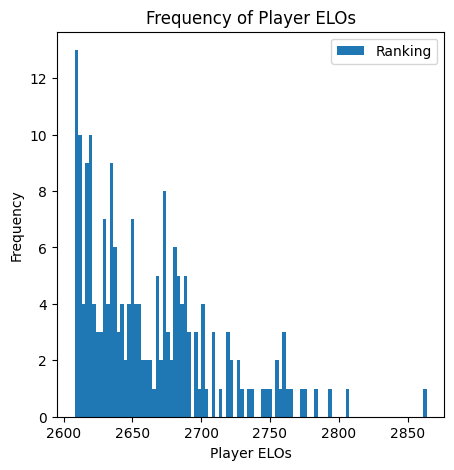

In [5]:
df_ELO = pd.DataFrame({'Players': df["name "],'Ranking': df["ELO "]})
bins = df_ELO.plot.hist(column=["Ranking"], bins=100, figsize = (5,5))
bins.set_xlabel("Player ELOs")
bins.set_title("Frequency of Player ELOs")

Text(0.5, 1.0, 'Average ELO Rating By Birth Year')

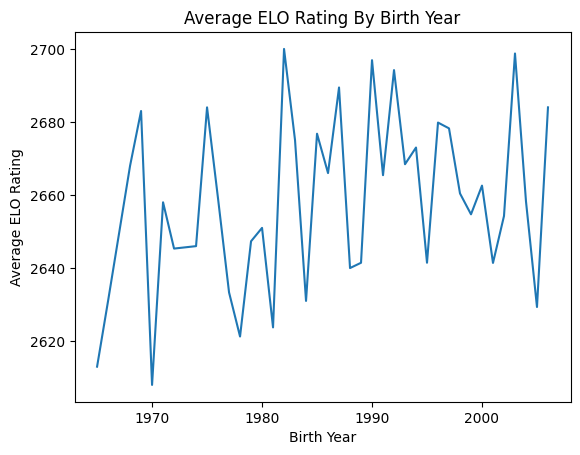

In [6]:
#might change to a scatterplot with line of best fit later
df_age = pd.DataFrame({'birth_year': df["birth_year"],'Rating': df["ELO "]})
df_age = df_age.sort_values(by="birth_year")
df_age = df_age.groupby("birth_year")["Rating"].mean()
line = df_age.plot.line(x = 'birth_year', y = 'Rating')
line.set_xlabel("Birth Year")
line.set_ylabel("Average ELO Rating")
line.set_title("Average ELO Rating By Birth Year")

<h1>Section 4: Planning for Part 2</h1>
<p>In the preliminary data analysis, we can see that by looking at the data visualizations and measures of spread, our data is squeued right becuase we are looking at the right tail of a normal curve. Likewise, there is an upward trend in the graph of Average ELO rating per birth year.<br>In part 2, I plan to examine the correlation between player age and player rating, similarly to the data shown in the third graph in part 3. This is to attempt to draw a relationship between, ELO rating and advances in Chess AI and computing. After examining these conclusions, I want to further explore this corelation by using linear regression to see where future players will be rated.</p>

<h1>Section 5: Data Science</h1>
<p> Here I will examine how age and number of games played relates to rating per player, more specifically examining how advances in tech may make younger players more skilled on average. To do this, I will find a line of best fit over the data from part one using linear regression, to see if average player rating increases as birth year increases.</p>

In [16]:
from sklearn.linear_model import LinearRegression

df_mean = df.groupby("birth_year")["ELO "].mean().reset_index()

dep = "ELO "
ind = ["birth_year"] # could add more features here

model = LinearRegression()
model = model.fit(df_mean[ind], df_mean[dep]) # reshape the dependent variables array
df["Predicted Rating"] = model.predict(df[ind])


<h1>Section 6: Different Data Visualization</h1> 
<p>The first figure is a scatterplot containing datapoints representing each player ordered by their birth year and rating. This graph represents the spread of the data, where most players are centralized near 2600 Elo with a few being much higher. This graph also adds the line of best fit, which generalizes the trend of rating increase over birth year. This visualization confirms the trend that average rating is increasing with birth year.<br> The second visualization is a scatterplot where each point is the average elo for that year. This visualization includes the line of best fit from the previous graph, along with an extrapolation line that extends the graph from 2006 to 2020. This line can be used to interpret how the mean rating of players in a birth year will increase over the next 14 years based upon the last 50 years of data.</p>

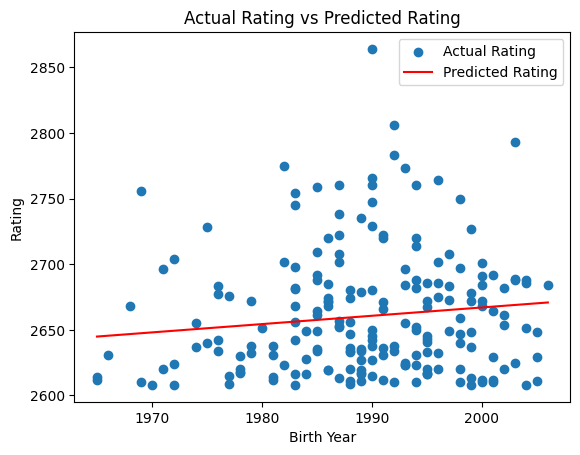

In [14]:
import matplotlib.pyplot as plt

plt.scatter(df_age['birth_year'], df_age['Rating'], label='Actual Rating')
plt.plot(df_age['birth_year'], df_age['Predicted Rating'], color='red', label='Predicted Rating')
plt.xlabel('Birth Year')
plt.ylabel('Rating')
plt.title('Actual Rating vs Predicted Rating')
plt.legend()
plt.show()


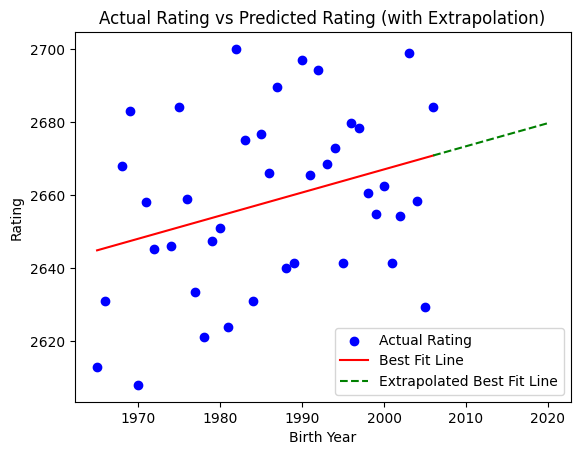

In [19]:
import numpy as np
import matplotlib.pyplot as plt

future_years = pd.DataFrame({"birth_year": np.arange(2006, 2021)})
future_years["Predicted Rating"] = model.predict(future_years[["birth_year"]])

plt.scatter(df_mean["birth_year"], df_mean["ELO "], label="Actual Rating", color="blue")
plt.plot(df_mean["birth_year"], df_mean["Predicted Rating"], color="red", label="Best Fit Line")
plt.plot(future_years["birth_year"], future_years["Predicted Rating"], color="green", linestyle="--", label="Extrapolated Best Fit Line")
plt.xlabel("Birth Year")
plt.ylabel("Rating")
plt.title("Actual Rating vs Predicted Rating (with Extrapolation)")
plt.legend()
plt.show()

<h1>Section 7: Overall Summary</h1> 
<p>My study analyzies the FIDE dataset of the top 200 chess players in the world in 2023. This dataset organizes the top world chess players by their Elo ranking among other important information, such as their Birth Year, Name, and International Federation. Some general heuristics about the dataset include the median rating being about 1650, the median birth year being 1990, and the standard deviation of the dataset being around 47 Elo points. Section 3 visualizes the entire dataset through a sorted bar chart of every players rating, while a histogram of the player ratings show that the data is left-squeued.<br> In the second half of the project, I used Sklearn to find the relationship between birth year and average rating to examine the corelation between a rise in Chess Technology and skill among professional players. There are two scatterplots in this section. The first uses linear regression of birth year and Elo rating to set the line of best fit for the all players in the dataset. The second scatterplot extends this LoBF to form an extrapolation line over datapoints representing the average rating per year. This line shows a positive correlation between birth year and chess rating going into the future. </p>